<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Trading Platform

## Risk Disclaimer

<font size="-1">
Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits. Leverage can work against you. Due to the certain restrictions imposed by the local law and regulation, German resident retail client(s) could sustain a total loss of deposited funds but are not subject to subsequent payment obligations beyond the deposited funds. Be aware and fully understand all risks associated with the market and trading. Prior to trading any products, carefully consider your financial situation and experience level. Any opinions, news, research, analyses, prices, or other information is provided as general market commentary, and does not constitute investment advice. FXCM & TPQ will not accept liability for any loss or damage, including without limitation to, any loss of profit, which may arise directly or indirectly from use of or reliance on such information.
</font>

## Author Disclaimer

The author is neither an employee, agent nor representative of FXCM and is therefore acting independently. The opinions given are their own, constitute general market commentary, and do not constitute the opinion or advice of FXCM or any form of personal or investment advice. FXCM assumes no responsibility for any loss or damage, including but not limited to, any loss or gain arising out of the direct or indirect use of this or any other content. Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits.

## Retrieving Tick Data

In [2]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [4]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [5]:
tdr?

Init signature: tdr(symbol, start, end, verbosity=False)
Docstring:     
fxcm_tick_data_reader, a class to fetch historical tick data provided 
by FXCM
Init docstring:
Constructor of the class.

Arguments:

symbol: string, one of fxcm_data_reader.symbols,
    defines the instrument to deliver data for.

start: datetime.datetime, datetime.date or string (defaut None),
    the first date to receive data for.

end: datetime.datetime, datetime.date or string (defaut None),
    the first date to receive data for.

verbosity: boolean (default: False), 
    whether to print output or not.
File:           e:\software\anaconda\lib\site-packages\fxcmpy\fxcmpy_data_reader.py
Type:           type
Subclasses:     fxcmpy_candles_data_reader


FXCM提供对历史市场价格数据集（例如分笔交易数据）的访问，这些数据预先经过打包。例如，你可以从FXCM服务器读取包含2018年第26周欧元/美元汇率分时数据的压缩文件，这将在之后的内容中介绍。之后的内容还将解释从API读取历史K线（蜡烛图）数据的方法。

In [6]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [30]:
start = dt.datetime(2020, 8, 1)  
stop = dt.datetime(2020, 8, 31)  

In [31]:
td = tdr('EURUSD', start, stop)  

In [32]:
# td.get_raw_data()方法返回包含原始数据的DataFrame对象；索引值仍然是字符串对象
td.get_raw_data().info()  

<class 'pandas.core.frame.DataFrame'>
Index: 9140598 entries, 07/26/2020 21:00:01.145 to 08/28/2020 20:59:06.454
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 209.2+ MB


In [33]:
# td.get_data()方法返回DataFrame对象，其索引已经转换为DatetimeIndex
td.get_data().info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9140598 entries, 2020-07-26 21:00:01.145000 to 2020-08-28 20:59:06.454000
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 209.2 MB


由于分笔交易数据保存在DataFrame对象中，所以选择一个数据子集实施典型金融分析任务就很简单了。

In [34]:
td.get_data().head()

,Bid,Ask
2020-07-26 21:00:01.145,1.16425,1.16445
2020-07-26 21:00:21.681,1.16426,1.16464
2020-07-26 21:00:21.683,1.16425,1.16455
2020-07-26 21:00:24.107,1.16426,1.16464
2020-07-26 21:01:52.408,1.16425,1.16455


In [37]:
sub = td.get_data(start='2020-08-12 12:00:00',
                  end='2020-08-12 12:30:00')  

In [38]:
sub.head()

,Bid,Ask
2020-08-12 12:00:00.013,1.17667,1.17667
2020-08-12 12:00:00.034,1.17668,1.17667
2020-08-12 12:00:00.043,1.17667,1.17667
2020-08-12 12:00:00.071,1.17668,1.17667
2020-08-12 12:00:00.151,1.17669,1.17667


In [39]:
# 从买入价和卖出价计算中间价
sub['Mid'] = sub.mean(axis=1)  

In [40]:
# 得出1000笔交易的SMA值
sub['SMA'] = sub['Mid'].rolling(1000).mean()  

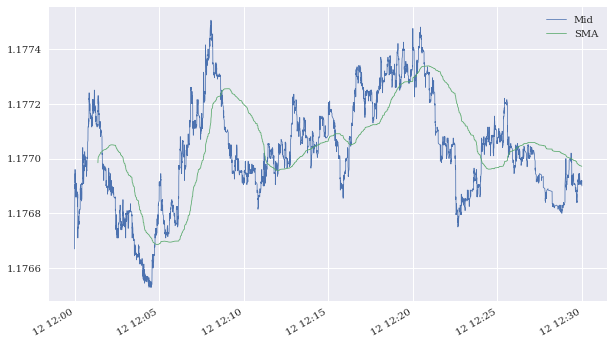

In [41]:
sub[['Mid', 'SMA']].plot(figsize=(10, 6), lw=0.75);
# plt.savefig('../../images/ch14/fxcm_plot_01.png')

Wall time: 9.45 s


<AxesSubplot:>

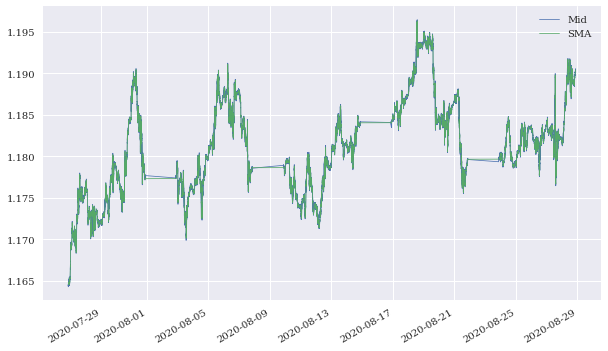

In [48]:
%%time
all = td.get_data()
all['Mid'] = all.mean(axis = 1)
all['SMA'] = all['Mid'].rolling(1000).mean()
all[['Mid', 'SMA']].plot(figsize=(10, 6), lw = 0.75)

## Retrieving Candles Data

FXCM还提供了对历史K线（蜡烛图）数据的访问（在API之外），也就是访问某些均匀的时间间隔中的数据，包括买入与卖出的开盘价、最高价、最低价和收盘价

In [49]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [50]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [17]:
# start = dt.datetime(2018, 5, 1)
# stop = dt.datetime(2018, 6, 30)

`period` must be one of `m1`, `H1` or `D1`

m1为一分钟，H1为一小时，D1为一天

In [51]:
period = 'H1'  

In [52]:
candles = cdr('EURUSD', start, stop, period)

In [53]:
data = candles.get_data()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2020-07-26 21:00:00 to 2020-08-28 20:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   600 non-null    float64
 1   BidHigh   600 non-null    float64
 2   BidLow    600 non-null    float64
 3   BidClose  600 non-null    float64
 4   AskOpen   600 non-null    float64
 5   AskHigh   600 non-null    float64
 6   AskLow    600 non-null    float64
 7   AskClose  600 non-null    float64
dtypes: float64(8)
memory usage: 42.2 KB


In [59]:
# 开盘、最高、最低、收盘买入卖出价
data.tail()  

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
2020-08-28 16:00:00,1.19003,1.19059,1.18878,1.18885,1.19005,1.19059,1.18880,1.18885
2020-08-28 17:00:00,1.18885,1.18928,1.18845,1.18866,1.18885,1.18928,1.18845,1.18868
2020-08-28 18:00:00,1.18866,1.18938,1.18841,1.18906,1.18868,1.18940,1.18841,1.18907
2020-08-28 19:00:00,1.18906,1.18991,1.18835,1.18983,1.18907,1.18992,1.18837,1.18984
2020-08-28 20:00:00,1.18983,1.19064,1.18969,1.19029,1.18984,1.19074,1.18973,1.19071


In [60]:
# 从收盘买入与卖出价计算出收盘中间价
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)  

In [61]:
# 计算两条SMA，一条用于较短的时间间隔，一条用于较长的时间间隔
data['SMA1'] = data['MidClose'].rolling(30).mean()  
data['SMA2'] = data['MidClose'].rolling(100).mean()  

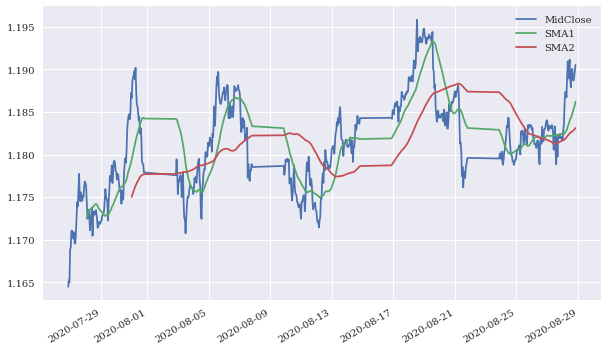

In [62]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));
# plt.savefig('../../images/ch14/fxcm_plot_02.png')

## Connecting to the API

In [63]:
import fxcmpy

In [64]:
# 连接到API；调整路径/文件名
api = fxcmpy.fxcmpy(config_file='../../env/fxcm.cfg')  

In [67]:
instruments = api.get_instruments()

In [68]:
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'VOLX', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'USOilSpot', 'UKOilSpot', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'EOS/USD', 'XLM/USD', 'ESPORTS', 'BIOTECH', 'CANNABIS', 'FAANG', 'CHN.TECH', 'CHN.ECOMM', 'USEquities']


## Retrieving Historical Data

一旦连接，具体时段数据的读取通过一次方法调用即可实现。使用get_candles()方法时，period参数可以是：m1、m5、m15、m30、H1、H2、H3、H4、H6、H8、D1、W1或M1。以下代码给出了几个例子

In [69]:
# 读取最近的10个日终价格
candles = api.get_candles('USD/JPY', period='D1', number=10)  

In [70]:
candles

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2020-08-30 21:00:00,105.333,105.446,105.501,105.378,105.404,105.483,105.609,105.447,223
2020-08-31 21:00:00,105.446,105.893,106.090,105.285,105.483,105.918,106.103,105.300,251450
2020-09-01 21:00:00,105.893,105.938,106.146,105.587,105.918,105.960,106.161,105.597,255027
2020-09-02 21:00:00,105.938,106.171,106.296,105.844,105.960,106.193,106.308,105.858,202646
2020-09-03 21:00:00,106.171,106.175,106.546,105.997,106.193,106.203,106.558,106.010,225986
2020-09-04 21:00:00,106.175,106.202,106.500,106.050,106.203,106.273,106.512,106.062,203253
2020-09-06 21:00:00,106.171,106.235,106.246,106.171,106.278,106.304,106.313,106.278,57
2020-09-07 21:00:00,106.235,106.198,106.380,106.126,106.304,106.316,106.392,106.137,126148
2020-09-08 21:00:00,106.198,106.007,106.376,105.855,106.316,106.065,106.389,105.868,179168


In [71]:
candles.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2020-08-30 21:00:00 to 2020-09-09 21:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bidopen   10 non-null     float64
 1   bidclose  10 non-null     float64
 2   bidhigh   10 non-null     float64
 3   bidlow    10 non-null     float64
 4   askopen   10 non-null     float64
 5   askclose  10 non-null     float64
 6   askhigh   10 non-null     float64
 7   asklow    10 non-null     float64
 8   tickqty   10 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 800.0 bytes


In [77]:
start = dt.datetime(2010, 1, 1)  
end = dt.datetime(2019, 12, 31)  

In [78]:
candles = api.get_candles('EUR/GBP', period='D1',
                          start=start, stop=end)  

In [79]:
candles.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2946 entries, 2010-01-04 22:00:00 to 2019-12-31 22:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bidopen   2946 non-null   float64
 1   bidclose  2946 non-null   float64
 2   bidhigh   2946 non-null   float64
 3   bidlow    2946 non-null   float64
 4   askopen   2946 non-null   float64
 5   askclose  2946 non-null   float64
 6   askhigh   2946 non-null   float64
 7   asklow    2946 non-null   float64
 8   tickqty   2946 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.2 KB


The parameter `period` must be one of `m1, m5, m15, m30, H1, H2, H3, H4, H6, H8, D1, W1` or `M1`.

In [75]:
candles = api.get_candles('EUR/USD', period='m1', number=250)  

<AxesSubplot:xlabel='date'>

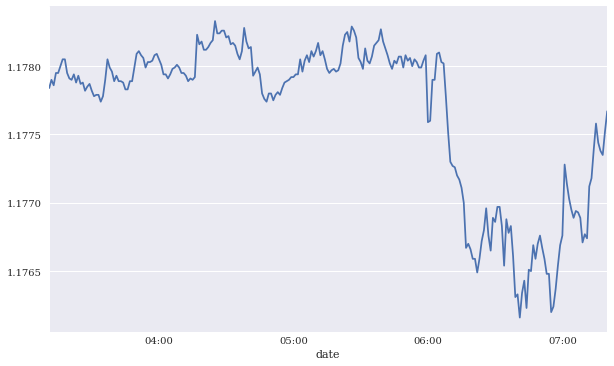

In [76]:
candles['askclose'].plot(figsize=(10, 6))
# plt.savefig('../../images/ch14/fxcm_plot_03.png');
# 欧元/美元历史收盘买入价（分钟线）

## Streaming Data

读取流数据

虽然历史数据很重要（例如对算法交易策略的事后检验），但持续访问实时或者流数据（在交易时间内）是部署和自动化算法交易策略所必需的。FXCM API可以订阅所有金融工具的实时数据流。fxcmpy包装器库支持这一功能，允许用户提供自定义函数（所谓的“回调函数”）以处理实时数据流。

以下代码展示了一个简单的回调函数，它仅仅打印在读取数据集中选择的元素，并在订阅所需金融工具（这里是欧元/美元）之后用其实时处理数据

In [81]:
# 回调函数(callback)是基于一个或者多个Python函数来处理实时流数据的灵活手段。它们可用于输入数据打印等简单任务，也可以用于根据在线交易算法（见第16章）生成买卖信号等复杂任务
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f' 
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'), 
             data['Rates'][0], data['Rates'][1]))  

In [82]:
# 订阅特定实时数据流；只要没有“解除订阅”事件，就异步处理数据
api.subscribe_market_data('EUR/USD', (output,))  

In [84]:
api.get_last_price('EUR/USD')  

39 | EUR/USD | 2020-09-09 07:25:14.392000 | 1.17741, 1.17754


Bid     1.17741
Ask     1.17754
High    1.17834
Low     1.17562
Name: 2020-09-09 07:25:14.392000, dtype: float64

In [85]:
api.unsubscribe_market_data('EUR/USD')  

## Placing Orders

FXCM API可以进行FXCM交易应用中的各类交易（如进场单或移动止损单）并对其进行管理。但是，下面的代码只介绍基本的市场买卖单，一般来说，这对算法交易入门就已经足够了。我们首先确认没有开仓头寸，然后建立不同的头寸（通过creat_market_buy_order()方法）

In [86]:
# 显示连接（默认）账户的开仓头寸
api.get_open_positions()  

""


In [87]:
# 在欧元/美元货币组合中建立10万个单位的头寸
order = api.create_market_buy_order('EUR/USD', 100)  

In [90]:
api.get_open_positions()  

,t,ratePrecision,tradeId,accountName,accountId,roll,com,open,valueDate,grossPL,...,currency,isBuy,amountK,currencyPoint,time,usedMargin,OpenOrderRequestTXT,stop,stopMove,limit
0,1,5,119397031,00823622,823622,0,0,1.17753,,-25.49591,...,EUR/USD,True,100,7.72603,09092020072649,1665,None,0,0,0


In [88]:
# 仅显示开仓头寸中选择的要素
sel = ['tradeId', 'amountK', 'currency',
       'grossPL', 'isBuy']  

In [89]:
api.get_open_positions()[sel]  

,tradeId,amountK,currency,grossPL,isBuy
0,119397031,100,EUR/USD,-16.22599,True


In [91]:
# 在欧元/英镑货币组合中再建立5万个单位的头寸
# create_market_buy_order()函数用于建立或者增加头寸，而create_market_sell_order()函数用于平仓或者减少头寸。平仓还有更通用的方法，如以下代码所示
order = api.create_market_buy_order('EUR/GBP', 50)  

In [92]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,119397031,100,EUR/USD,-20.85482,True
1,119397122,50,EUR/GBP,-9.50000,True


In [93]:
order = api.create_market_sell_order('EUR/USD', 25)  

In [94]:
order = api.create_market_buy_order('EUR/GBP', 50)  

In [95]:
api.get_open_positions()[sel]  

,tradeId,amountK,currency,grossPL,isBuy
0,119397031,100,EUR/USD,-22.41130,True
1,119397122,50,EUR/GBP,12.00000,True
2,119397128,25,EUR/USD,-2.12521,False
3,119397129,50,EUR/GBP,-8.00000,True


In [96]:
# close_all_for_symbol()方法平掉指定代码的所有仓位
api.close_all_for_symbol('EUR/GBP')  

In [97]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,119397031,100,EUR/USD,-22.40948,True
1,119397128,25,EUR/USD,-2.70459,False


In [98]:
# close_all()方法平掉所有开仓
api.close_all()  

In [99]:
api.get_open_positions()

""


## Account Information

除了建仓之外，FXCM API也可以读取更多常规账户信息。例如，用户可以查询默认账户（如果有多个账户的话），或者净值及保证金情况

In [100]:
api.get_default_account()  

823622

In [101]:
# 显示所有账户的财务状况和一些参数
api.get_accounts().T  

,0
t,6
ratePrecision,0
accountId,823622
balance,49997.2
usdMr,0
mc,N
mcDate,
accountName,00823622
usdMr3,0
hedging,Y
